In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [10]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name = "deepseek-r1-distill-llama-70b",
temperature = 0)

response = llm.invoke("Hi").content
response

'<think>\n\n</think>\n\nHello! How can I assist you today? 😊'

In [11]:
from langchain_core.tools import tool

In [12]:
@tool
def multiply(a:int, b:int)->int:
    """Just takes in two ints and gives product"""
    pass

@tool 
def add(a:int, b:int)->int:
    """Just takes in two ints and gives addition"""
    pass

@tool 
def divide(a:int, b:int)->float:
    """Just takes in two ints and gives division"""
    pass

Imbuilt Tool for web crawler

In [13]:
from langchain_community.tools import DuckDuckGoSearchRun

In [14]:
search = DuckDuckGoSearchRun()

In [15]:
search.invoke("Latest update on iPhone 17")

'2025 could bring one of the biggest updates to the iPhone\'s design that we\'ve seen since the 2017 iPhone X, with Apple rumored to be planning for an all-new iPhone 17 "Air" that has a much thinner ... CUPERTINO, CALIFORNIA Apple today previewed iOS 26, a major update that brings a beautiful new design, intelligent experiences, and improvements to the apps users rely on every day.The new design provides a more expressive and delightful experience across the system while maintaining the instant familiarity of iOS. iPhone 17: New slimmer \'iPhone 17 Air\' model. ... Various rumors suggest that the new iPhones could benefit from the following updates: Design and display. Right now, the most powerful MagSafe wireless charging for the latest iPhone 16 is 25W. More than that, another benefit for Qi 2.2 it\'s more efficient, with less power loss or heat generation. The pressure was on for Apple to prove that Apple Intelligence justifies buying a new iPhone or Mac. ... (i.e. iOS 17 to iOS 18

In [16]:
tools = [multiply, add, divide, search]

In [17]:
llm_with_tools = llm.bind_tools(tools)

In [19]:
response = llm_with_tools.invoke("Hi")

In [20]:
response.content

'Hello! How can I assist you today?'

In [21]:
response.tool_calls

[]

In [23]:
response = llm_with_tools.invoke("What is 2+2?")

In [24]:
response.content

''

In [25]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'q1y7exd4x',
  'type': 'tool_call'}]

In [28]:
response = llm_with_tools.invoke("what is current age of TATA group")

In [29]:
response.content

''

In [30]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'Tata Group founding year'},
  'id': '7ash3de2t',
  'type': 'tool_call'}]

In [73]:
SYSTEM_PROMPT = "You are a helpful assistant tasked with using search and performing arithmetic operations"

In [ ]:
# user_query = ["Tell me 2+2"]

In [ ]:
# [SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic operations',
 'Tell me 2+2']

In [77]:
def function_1(state):
    user_question = state["messages"]
    input_question = [SYSTEM_PROMPT]+user_question
    response = llm_with_tools.invoke(input_question)
    return {
        "messages" :[response] 
    }

In [78]:
from langgraph.graph import StateGraph, END, MessagesState, START
from langchain_core.messages import HumanMessage, AIMessage

In [79]:
builder = StateGraph(MessagesState)

In [80]:
from langgraph.prebuilt import ToolNode, tools_condition

In [81]:

builder.add_node("llm_decision_step",function_1)
builder.add_node("tools",ToolNode(tools)) #convert the tools list into a node

In [82]:
builder.add_edge(START, "llm_decision_step")

In [83]:
builder.add_conditional_edges("llm_decision_step",
                             tools_condition
                             )

In [84]:
builder.add_edge("tools", "llm_decision_step")

In [87]:
react_graph = builder.compile()

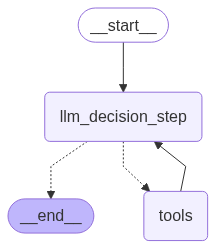

In [88]:
from IPython.display import Image,display
display(Image(workflow.get_graph().draw_mermaid_png()))

In [91]:
message = [HumanMessage("What is 2 times Narendr Modi's age?")]

In [92]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content="What is 2 times Narendr Modi's age?", additional_kwargs={}, response_metadata={}, id='3854f23d-97d7-48c4-8c6b-bbc37110a29a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wfst7b5xj', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 303, 'prompt_tokens': 312, 'total_tokens': 615, 'completion_time': 1.23405166, 'prompt_time': 0.019702524, 'queue_time': 0.053449386, 'total_time': 1.253754184}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b5a0164a-7a83-451f-a6bb-f8ba27eb1da9-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age'}, 'id': 'wfst7b5xj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 312, 'output_tokens': 303, 'total_tokens': 615}),
  ToolMessage(content='Narendra Modi i

In [94]:
import yfinance as yf

In [95]:
@tool
def get_stock_price(ticker:str)->str:
    "LOL"

In [96]:
get_stock_price.invoke("Tesla")

In [97]:
tools

[StructuredTool(name='multiply', description='Just takes in two ints and gives product', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001E702AA8040>),
 StructuredTool(name='add', description='Just takes in two ints and gives addition', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001E702F10540>),
 StructuredTool(name='divide', description='Just takes in two ints and gives division', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000001E702F105E0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))]

In [98]:
tools = [add, multiply, divide, search, get_stock_price]

In [100]:
llm_with_tools = llm.bind_tools(tools)

In [102]:
response = llm_with_tools.invoke("Can you give me latest stock price adani greens?")

In [103]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'mn9d72rqf', 'function': {'arguments': '{"ticker":"ADANIGREEN.NS"}', 'name': 'get_stock_price'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 329, 'total_tokens': 451, 'completion_time': 0.573861664, 'prompt_time': 0.02074366, 'queue_time': 0.054594470000000006, 'total_time': 0.594605324}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1b5b068c-1b62-4dca-9bf2-17f73a3b4276-0', tool_calls=[{'name': 'get_stock_price', 'args': {'ticker': 'ADANIGREEN.NS'}, 'id': 'mn9d72rqf', 'type': 'tool_call'}], usage_metadata={'input_tokens': 329, 'output_tokens': 122, 'total_tokens': 451})

In [104]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': 'mn9d72rqf',
  'type': 'tool_call'}]

In [105]:
SYSTEM_PROMPT = "You are a helpful assistant tasked with using search, yahoo finance and performing arithmetic operations"

In [106]:
def function_1(state):
    user_question = state["messages"]
    input_question = [SYSTEM_PROMPT]+user_question
    response = llm_with_tools.invoke(input_question)
    return {
        "messages" :[response] 
    }

In [107]:
builder = StateGraph(MessagesState)

In [108]:
builder.add_node("llm_decision_step",function_1)
builder.add_node("tools",ToolNode(tools))

In [109]:
builder.add_edge(START, "llm_decision_step")

In [110]:
builder.add_conditional_edges("llm_decision_step",
                             tools_condition
                             )

In [111]:
builder.add_edge("tools", "llm_decision_step")

In [113]:
react_graph_2 = builder.compile()

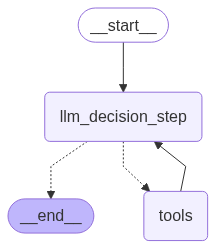

In [114]:
from IPython.display import Image,display
display(Image(react_graph_2.get_graph().draw_mermaid_png()))

In [120]:
message = [HumanMessage("current apple stock price with latest news of apple")]

In [121]:
react_graph_2.invoke({"messages":message})

{'messages': [HumanMessage(content='current apple stock price with latest news of apple', additional_kwargs={}, response_metadata={}, id='aa951a56-5d29-4c5f-80be-be10a99e5873'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '14q82dyaj', 'function': {'arguments': '{"ticker":"AAPL"}', 'name': 'get_stock_price'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 312, 'prompt_tokens': 344, 'total_tokens': 656, 'completion_time': 1.297839012, 'prompt_time': 0.029430004, 'queue_time': 0.053307307, 'total_time': 1.327269016}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b9665fc5-cec5-45c3-b912-a6f3fb396e3a-0', tool_calls=[{'name': 'get_stock_price', 'args': {'ticker': 'AAPL'}, 'id': '14q82dyaj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 344, 'output_tokens': 312, 'total_tokens': 656}),
  ToolMessage(content='null', name='get_stock_pri

In [123]:
for m in message:
  m.pretty_print()

================================ Human Message =================================

current apple stock price with latest news of apple


In [ ]:
Assignment 4: 
AI Travel Agent and expense planner for any city worldwide
Design trip planning agent  

1. Real time weather info
2. Top attraction and activities 
3. Hotel cost (per day)
4. Currency conversion in native currency
5. Itinerary generation
6. Total expense calculation
7. Generate summary of entire output 

Flow->

input from user->->search an attraction,restaurent, activity, transportation->-> real time weather forecast and curent weather->->Hotel cost according to budget range->->calculate cost daily
->->

SyntaxError: invalid syntax (1657396876.py, line 1)